In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from skimage import io, color, img_as_float
from skimage.restoration import wiener
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim


In [19]:
image=io.imread("noisy_img.jpg")
img=img_as_float(image)
if img.ndim==3:
    img=color.rgb2gray(image)

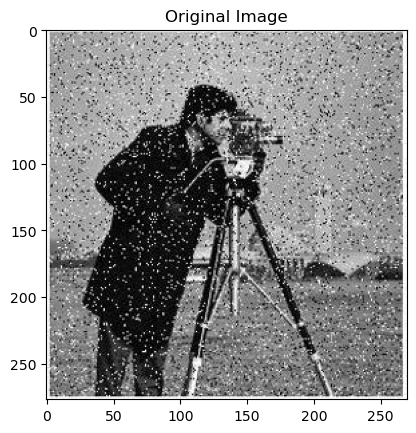

In [25]:
plt.imshow(img,cmap='gray')
plt.title('Original Image')

plt.show()

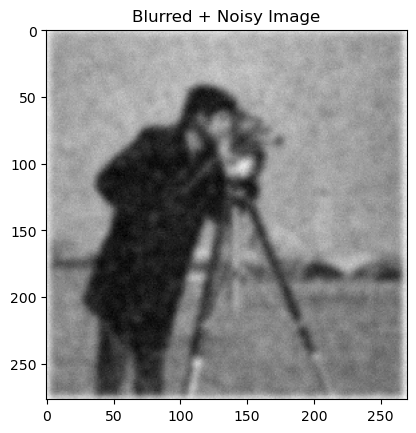

In [57]:
m, n = img.shape
sigma = 2.5
y, x = np.indices((m, n))
cy, cx = m // 2, n // 2
psf = np.exp(-((x - cx)**2 + (y - cy)**2) / (2.0 * sigma**2))
psf /= psf.sum()
IMG = fftpack.fft2(img)
PSF = fftpack.fft2(fftpack.ifftshift(psf))
blurred = np.real(fftpack.ifft2(IMG * PSF))
noise_sigma = 0.02
noisy = blurred + np.random.normal(scale=noise_sigma, size=blurred.shape)
noisy = np.clip(noisy, 0, 1)
plt.imshow(noisy, cmap='gray')
plt.title("Blurred + Noisy Image")
plt.show()

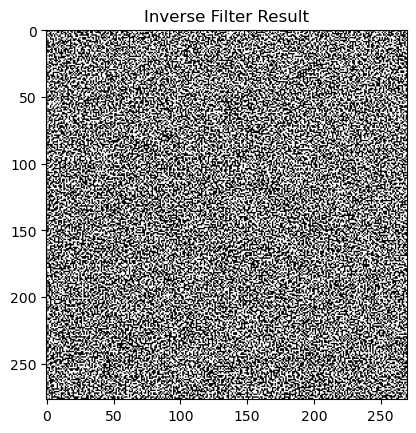

In [66]:
eps = 1e-3
IMGn = fftpack.fft2(noisy)
inv = IMGn / (PSF + eps)
rec_inv = np.real(fftpack.ifft2(inv))
rec_inv = np.clip(rec_inv, 0, 1)
plt.imshow(rec_inv, cmap='gray')
plt.title("Inverse Filter Result")
plt.show()

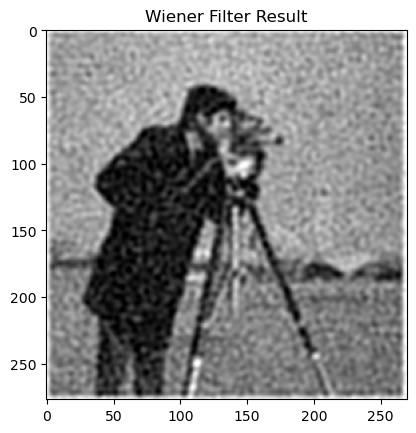

In [68]:
noise_var = noise_sigma**2
signal_var = np.var(img)
K = noise_var / (signal_var + 1e-12)
H_conj = np.conj(PSF)
H_abs2 = np.abs(PSF)**2
wiener_freq = (H_conj / (H_abs2 + K)) * IMGn
rec_wiener = np.real(fftpack.ifft2(wiener_freq))
rec_wiener = np.clip(rec_wiener, 0, 1)
plt.imshow(rec_wiener, cmap='gray')
plt.title("Wiener Filter Result")
plt.show()

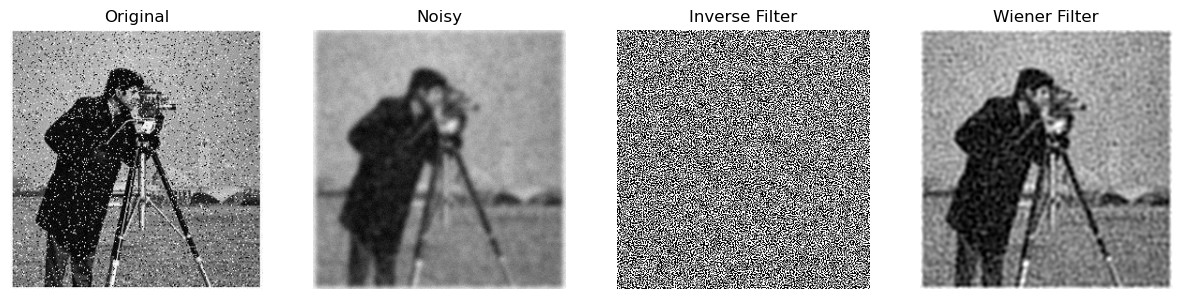

In [63]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img, cmap='gray'); axes[0].set_title("Original"); axes[0].axis("off")
axes[1].imshow(noisy, cmap='gray'); axes[1].set_title("Noisy"); axes[1].axis("off")
axes[2].imshow(rec_inv,cmap='gray');axes[2].set_title("Inverse Filter");axes[2].axis("off")
axes[3].imshow(rec_wiener, cmap='gray'); axes[3].set_title("Wiener Filter"); axes[3].axis("off")
plt.show()